# Context-Free Grammars and Parsing with NLTK
Partially taken from the NLTK book


## Initializations:


In [1]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt-get update
!apt install ghostscript python3-tk
#from ctypes.util import find_library
#find_library("gs")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 1s (947 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/

## Loading a CFG grammar:

In [2]:
import nltk

from nltk import CFG
from IPython.display import display

grammar = CFG.fromstring("""
   S -> NP VP
   PP -> P NP
   NP -> Det N | NP PP
   VP -> V NP | VP PP
   Det -> 'a' | 'the'
   N -> 'dog' | 'cat'
   V -> 'chased' | 'sat'
   P -> 'on' | 'in'
 """)

## Analyzing sentences:

In [3]:
sent1 = "the dog chased the cat".split()
sent2 = "the dog chased the cat on the dog".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sent1): print(p)

(S (NP (Det the) (N dog)) (VP (V chased) (NP (Det the) (N cat))))


### Viewing the syntax tree:

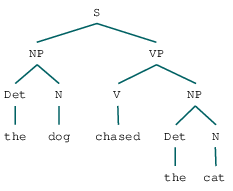

In [4]:
# A single parse tree
display(p)

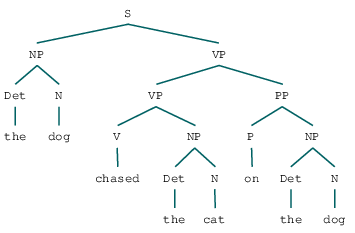

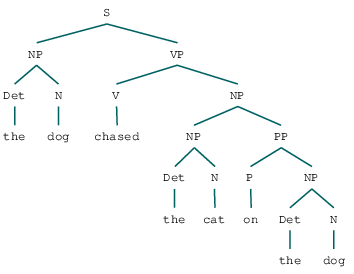

In [5]:
# When there are several analyses
for p in chart_parser.parse(sent2): display(p)

## Generating sentences given a CFG:


In [6]:
from nltk.parse.generate import generate, demo_grammar
from nltk import CFG
grammar = CFG.fromstring(demo_grammar)
print(grammar)

Grammar with 13 productions (start state = S)
    S -> NP VP
    NP -> Det N
    PP -> P NP
    VP -> 'slept'
    VP -> 'saw' NP
    VP -> 'walked' PP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'park'
    N -> 'dog'
    P -> 'in'
    P -> 'with'


In [7]:
for sentence in generate(grammar, n=50, depth=5):
     print(' '.join(sentence))

the man slept
the man saw the man
the man saw the park
the man saw the dog
the man saw a man
the man saw a park
the man saw a dog
the park slept
the park saw the man
the park saw the park
the park saw the dog
the park saw a man
the park saw a park
the park saw a dog
the dog slept
the dog saw the man
the dog saw the park
the dog saw the dog
the dog saw a man
the dog saw a park
the dog saw a dog
a man slept
a man saw the man
a man saw the park
a man saw the dog
a man saw a man
a man saw a park
a man saw a dog
a park slept
a park saw the man
a park saw the park
a park saw the dog
a park saw a man
a park saw a park
a park saw a dog
a dog slept
a dog saw the man
a dog saw the park
a dog saw the dog
a dog saw a man
a dog saw a park
a dog saw a dog


## Example: issues in grammar design: avoid unnecessary ambiguity


(ADJP
  (ADJP (ADJP (ADJP white) (ADJP expensive)) (ADJP tall))
  (ADJP small))


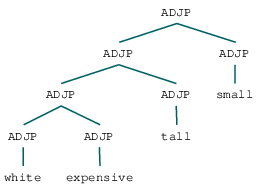

(ADJP
  (ADJP (ADJP white) (ADJP (ADJP expensive) (ADJP tall)))
  (ADJP small))


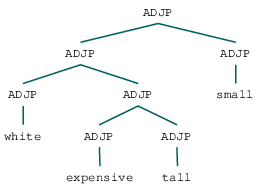

(ADJP
  (ADJP white)
  (ADJP (ADJP (ADJP expensive) (ADJP tall)) (ADJP small)))


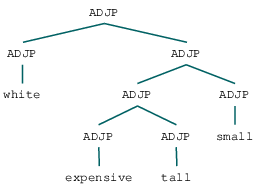

(ADJP
  (ADJP white)
  (ADJP (ADJP expensive) (ADJP (ADJP tall) (ADJP small))))


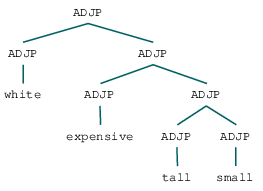

(ADJP
  (ADJP (ADJP white) (ADJP expensive))
  (ADJP (ADJP tall) (ADJP small)))


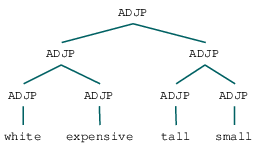

In [8]:
import nltk
from nltk import CFG

grammar = CFG.fromstring("""
   ADJP -> ADJP ADJP
   ADJP -> 'white' | 'tall' | 'small' | 'expensive'
""")

sentence = "white expensive tall small".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

## Exercise: rewrite the grammar so that there is only a single analysis for adjective chains

(ADJP
  (ADJ white)
  (ADJP (ADJ expensive) (ADJP (ADJ tall) (ADJP (ADJ small)))))


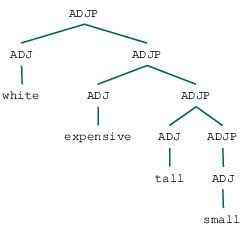

In [15]:
grammar2 = CFG.fromstring("""
   # Design your new ADJP grammar based on this one:
   ADJP -> ADJ ADJP | ADJ
   ADJ -> 'white' | 'tall' | 'small' | 'expensive'
""")

sentence = "white expensive tall small".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar2)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

## Exercise (homework assignment)

Take the following grammar:

In [16]:
from nltk import CFG

grammar = CFG.fromstring("""
 S -> NP VP
 PP -> P NP
 NP -> Det N | NP PP
 NP -> Det ADJ N
 VP -> V NP | VP PP
 Det -> 'a' | 'the'
 N -> 'dog' | 'cat'
 V -> 'chased' | 'sat'
 P -> 'on' | 'in'
 ADJ -> 'big' | ADJ 'big'
 S1 -> NP VP | NP V
 S -> S CORD S1
 CORD -> 'and'
 """)

### Sentence

In [20]:
# Sentence
sentence = ""
# Basic Rule
sentence += "S -> NP VP" + "\n"
# Unfortunately Abigail ate the kimchi.
sentence += "S -> ADVP NP VP" + "\n"
# Abigail ate the kimchi and Max had a burger.
sentence += "S -> S CC S" + "\n"
# Eat the kimchi.
sentence += "S -> VP" + "\n"
sentence

'S -> NP VP\nS -> ADVP NP VP\nS -> S CC S\nS -> VP\n'

### Noun Phrase

Write rules:
* Simple sentences:
  * the big white cat sat on the dog
  * today the big white cat sat on the dog
  * Sally ate a sandwich .
  * Sally and the president wanted and ate a sandwich .
  * the president sighed .
  * the president thought that a sandwich sighed .
  * it perplexed the president that a sandwich ate Sally .
  * the very very very perplexed president ate a sandwich .
  * the president worked on every proposal on the desk .
* Relative clauses:
  * the cat that the dog chased chased the dog
* Coordination:
  * The cat and the dog chased the cat
* **Always save the last correct grammar (and example sentences)!** <br> Any change can have positive or negative effects, and there must always be a way to go back to the last correct version
* Document the resulting grammar: range of syntactic constructions covered, example analyses, limitations, ...
* Provide 5 random sentences generated with your last version of the grammar  illustrating your modifications.

Something to start with:

(S
  (NP (Det the) (ADJ big) (N dog))
  (VP (V chased) (NP (Det the) (ADJ big) (N cat))))


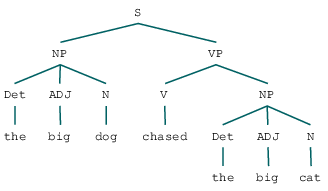

In [18]:
sentence = "the big dog chased the big cat".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)